# **Is the proportion of theft occurring in the neighbourhood of West Point Grey higher than Dunbar-Southlands?**

By Group 34: Andy Hu, Wendi Ke, CC Liang, and Mridul Manas

# Introduction
Crime brings chills down everyone’s spines, with theft being the most common type of crime in Canada ([Government of Canada](https://www.justice.gc.ca/eng/cj-jp/state-etat/2019rpt-rap2019/p7.html)). Section 322 of the Canadian Criminal Code defines "theft" as "fraudulently and without colour of right" taking someone's property or converting its ownership ([Criminal Code](https://laws-lois.justice.gc.ca/eng/acts/c-46/section-322.html)). Understanding crime statistics is crucial to enhancing community relations, measuring prevention initiatives, and minimizing risks by making better decisions ([Vancouver Police Department](https://vpd.ca/crime-statistics/)). In this paper, we will study the population of theft crime in Dunbar-Southlands and West Point Grey, the two neighbourhoods closest to the UBC Vancouver campus ([UBC Vantage College](https://vantagecollege.ubc.ca/blog/your-guide-neighborhoods-vancouver)).


### Research Question
Is the proportion of theft occurring in the neighbourhood of West Point Grey higher than Dunbar-Southlands? 

### Variables
The random variable of interest for comparing is the proportion of theft in the neighbourhoods of Dunbar-Southlands and West Point Grey. Of the response variable, differences in proportions is the location parameter and standard error is the scale parameter.

### Hypotheses
- Null Hypothesis $H_0$: There is no difference between the proportion of theft in the neighbourhoods of Dunbar-Southlands and West Point Grey; $H_0: p_w - p_d = 0$
- Alternative Hypothesis $H_A$: The proportion of theft in West Point Grey is higher than in Dunbar-Southlands; $H_A: p_w - p_d > 0$

### Dataset Description
To conduct our research, we use the [Vancouver Police Department (VPD) crime data](https://geodash.vpd.ca/opendata/), which includes information on the different types of crimes occurring at specific geographical locations from 2003 to 2023. We will be primarily focusing on crimes within the last 5 years, 2018 to 2022, for the neighbourhoods of Dunbar-Southlands and West Point Grey in order to base our research upon more recent and prevalent information about contemporary crimes.

# Methods and Results
We will carry a two-sample z-test as we are comparing two proportions. From a random sampling, we will use bootstrapping after setting the seeds to make the analysis reproducible, calculate the difference in proportions and standard error, and find the test statistic using 
$$
Z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$

We obtain our p-value to check for statistical significance and construct a 95% confidence interval to quantify the errors of  the estimates. Using our p-value and a significance level of 0.05, we will decide whether we should reject our null hypothesis or not.

### Loading Packages
The `tideverse` and `infer` packages allow us to clean and wrangle data, create visualizations, and make statistical inferences. We also set the plot width and height and load some colour-blind-friendly palettes.

In [1]:
library(tidyverse)
library(infer)

options(repr.plot.width = 10, repr.plot.height = 6)
palette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#000000", "#E69F00", 
    "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Reading the Dataset
Our dataset is a .csv file with headers and has been uploaded to our GitHub repository so we can read it directly from web using `read_csv`.

In [2]:
crime <- read.csv("https://raw.githubusercontent.com/fankayii/STAT201_34/main/crime.csv")
head(crime)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft from Vehicle,2008,12,7,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
2,Theft from Vehicle,2009,8,28,19,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
3,Theft from Vehicle,2012,7,25,12,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
4,Theft from Vehicle,2014,5,8,12,49,11XX E HASTINGS ST,Strathcona,494141.1,5458690
5,Theft from Vehicle,2014,10,19,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
6,Theft from Vehicle,2015,2,18,18,30,11XX E HASTINGS ST,Strathcona,494141.1,5458690


### Cleaning and Wrangling Data
`Filter` for years 2018 to 2022 and the two neighbourhoodsDiscussion


In [3]:
crime_recent_5_years <- crime %>%
    filter(YEAR>=2018 & YEAR<=2022) %>%
    filter(NEIGHBOURHOOD %in% c("West Point Grey","Dunbar-Southlands")) %>%
    select(TYPE,NEIGHBOURHOOD)
head(crime_recent_5_years)

,TYPE,NEIGHBOURHOOD
,<chr>,<chr>
1,Theft from Vehicle,West Point Grey
2,Theft from Vehicle,West Point Grey
3,Theft from Vehicle,West Point Grey
4,Theft from Vehicle,West Point Grey
5,Theft from Vehicle,West Point Grey
6,Theft from Vehicle,West Point Grey


Tidy crime type using `pivot_wider`

In [4]:
crime_type_pivot <- crime_recent_5_years %>%
    group_by(NEIGHBOURHOOD, TYPE) %>%
    summarize(count = n()) %>%
    pivot_wider(names_from = TYPE,
                values_from = count)
head(crime_type_pivot)

`summarise()` has grouped output by 'NEIGHBOURHOOD'. You can override using the
`.groups` argument.


NEIGHBOURHOOD,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Offence Against a Person,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Homicide
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Dunbar-Southlands,57,345,330,94,371,726,100,53,1,88,NA
West Point Grey,69,334,243,86,282,681,121,48,4,64,1


Combine all theft columns into one using `mutate`

In [5]:
crime_theft <- crime_type_pivot %>%
    mutate(Theft = `Other Theft` + `Theft from Vehicle` + `Theft of Bicycle` + `Theft of Vehicle`) %>%
    select(NEIGHBOURHOOD, `Break and Enter Commercial`, `Break and Enter Residential/Other`, `Mischief`, 
           `Offence Against a Person`, `Vehicle Collision or Pedestrian Struck (with Fatality)`,
           `Vehicle Collision or Pedestrian Struck (with Injury)`, `Homicide`, `Theft`)
crime_theft

NEIGHBOURHOOD,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Offence Against a Person,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Homicide,Theft
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Dunbar-Southlands,57,345,330,94,1,88,NA,1250
West Point Grey,69,334,243,86,4,64,1,1132


Tidy by replacing NA value with 0 using `replace`

In [6]:
crime_tidy_theft <- crime_theft %>%
    replace(is.na(crime_theft), 0)
crime_tidy_theft

NEIGHBOURHOOD,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Offence Against a Person,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Homicide,Theft
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Dunbar-Southlands,57,345,330,94,1,88,0,1250
West Point Grey,69,334,243,86,4,64,1,1132


**Our dataset is now tidy and ready to be used.**

### Computing Estimates of the Parameter
Tally the total crime using `mutate` and calculate the proportion of theft crime 

In [7]:
crime_summary <- crime_tidy_theft %>%
    mutate(total_crime = sum(`Break and Enter Commercial`, `Break and Enter Residential/Other`, `Mischief`, 
           `Offence Against a Person`,`Vehicle Collision or Pedestrian Struck (with Fatality)`,
           `Vehicle Collision or Pedestrian Struck (with Injury)`, `Homicide`, `Theft`),
           prop = Theft / total_crime)
crime_summary

NEIGHBOURHOOD,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Offence Against a Person,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Homicide,Theft,total_crime,prop
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
Dunbar-Southlands,57,345,330,94,1,88,0,1250,2165,0.5773672
West Point Grey,69,334,243,86,4,64,1,1132,1933,0.5856182


Calculate the difference in proportions $p_w - p_d$

In [8]:
estimate_diff <- crime_summary %>% filter(NEIGHBOURHOOD == "West Point Grey") %>% pull(prop) -
    crime_summary %>% filter(NEIGHBOURHOOD == "Dunbar-Southlands") %>% pull(prop)
estimate_diff

[1] 0.008251004

Calculate the standard error

In [9]:
estimate_nw <- crime_summary %>% filter(NEIGHBOURHOOD == "West Point Grey") %>% pull(Theft)
estimate_nd <- crime_summary %>% filter(NEIGHBOURHOOD == "Dunbar-Southlands") %>% pull(Theft)
estimate_pw <- crime_summary %>% filter(NEIGHBOURHOOD == "West Point Grey") %>% pull(prop)
estimate_pd <- crime_summary %>% filter(NEIGHBOURHOOD == "Dunbar-Southlands") %>% pull(prop)
estimate_p_hat <- (estimate_nw * estimate_pw + estimate_nd * estimate_pd) / (estimate_nw + estimate_nd)

estimate_std_error <- sqrt(estimate_p_hat * (1 - estimate_p_hat) * (1 / estimate_nw + 1 / estimate_nd))
estimate_std_error

[1] 0.02024165

Present the estimates of the parameter in a table using `tibble`

In [10]:
tibble(n_west_point_grey = estimate_nw,
       n_dunbar_southlands = estimate_nd,
       p_west_point_grey = estimate_pw,
       p_dunbar_southlands = estimate_pd,
       p_hat = estimate_p_hat,
       diff_in_props = estimate_diff,
       std_error = estimate_std_error)

n_west_point_grey,n_dunbar_southlands,p_west_point_grey,p_dunbar_southlands,p_hat,diff_in_props,std_error
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1132,1250,0.5856182,0.5773672,0.5812883,0.008251004,0.02024165


### Visualizing Raw Data
Let's visualize the crime count and proportion.

`summarise()` has grouped output by 'NEIGHBOURHOOD'. You can override using the
`.groups` argument.


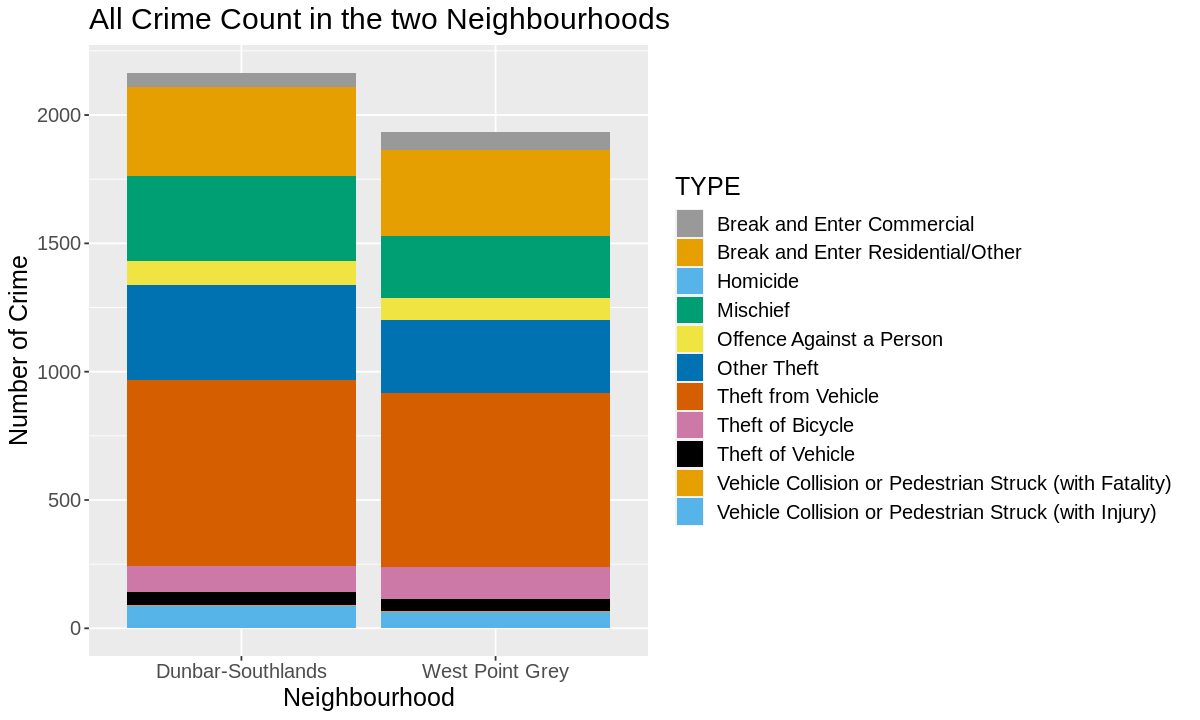

In [11]:
two_neighbourhoods_all_crime <- crime_recent_5_years %>%
    group_by(NEIGHBOURHOOD, TYPE) %>%
    summarize(count = n()) %>%
    ggplot(aes(x = NEIGHBOURHOOD, y = count, fill = TYPE)) +
    geom_bar(stat = "identity") +
    labs(title = "All Crime Count in the two Neighbourhoods",
         x = "Neighbourhood",
         y = "Number of Crime",
         colour = "Type of Crime") +
    theme(text = element_text(size = 15)) +
    scale_fill_manual(values = palette)

two_neighbourhoods_all_crime

Next, we combine the major crime type into one: break and enter, theft, vehicle collision, and others.

`summarise()` has grouped output by 'NEIGHBOURHOOD'. You can override using the
`.groups` argument.


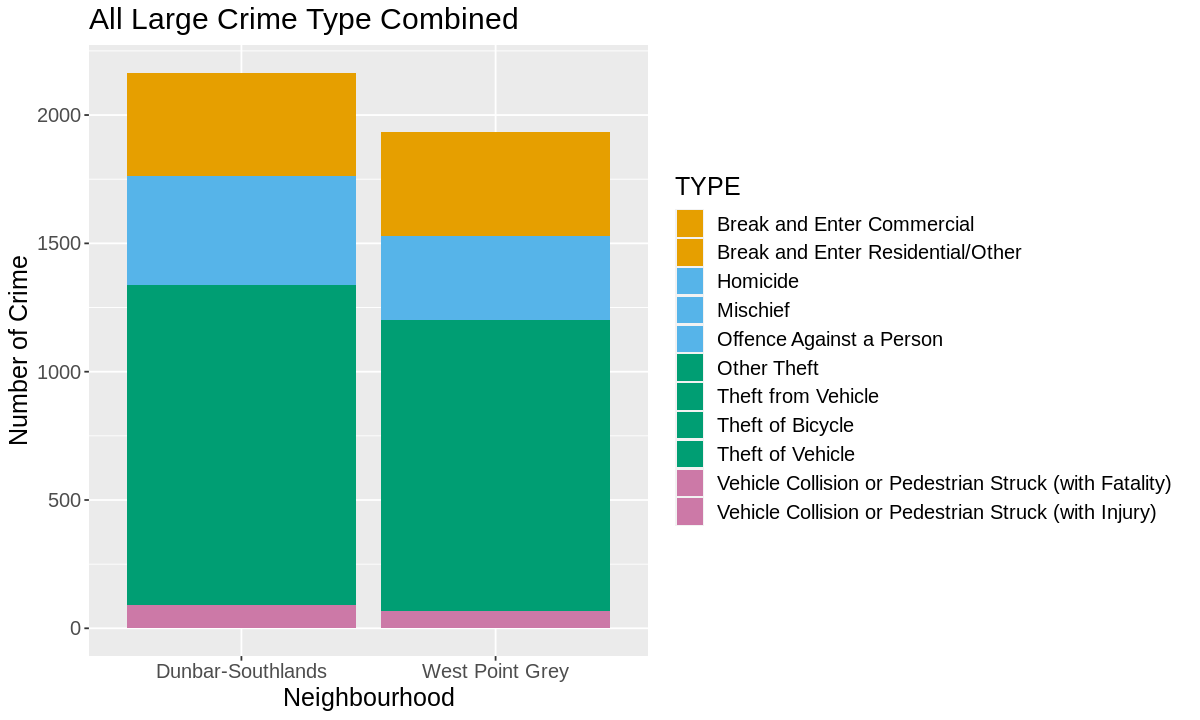

In [12]:
group_by_crime <- crime_recent_5_years %>%
    group_by(NEIGHBOURHOOD, TYPE) %>%
    summarize(count = n()) %>%
    ggplot(aes(x = NEIGHBOURHOOD, y = count, fill = TYPE)) +
    geom_bar(stat = "identity") +
    labs(title = "All Large Crime Type Combined",
         x = "Neighbourhood",
         y = "Number of Crime",
        colour = "Type of Crime") +
    theme(text = element_text(size = 15)) +
    scale_fill_manual(labels = c("Break and Enter Commercial", "Break and Enter Residential/Other", "Homicide", "Mischief", 
                                  "Offence Against a Person", "Other Theft", "Theft from Vehicle", "Theft of Bicycle", 
                                  "Theft of Vehicle", "Vehicle Collision or Pedestrian Struck (with Fatality)", 
                                  "Vehicle Collision or Pedestrian Struck (with Injury)"), 
                       values = c("#E69F00", "#E69F00", "#56B4E9", "#56B4E9", "#56B4E9", "#009E73", "#009E73", "#009E73", 
                                  "#009E73", "#CC79A7", "#CC79A7"))
group_by_crime

From this plot, we can see that theft is indeed the most common type of crime as it has the greatest areas on the graph.

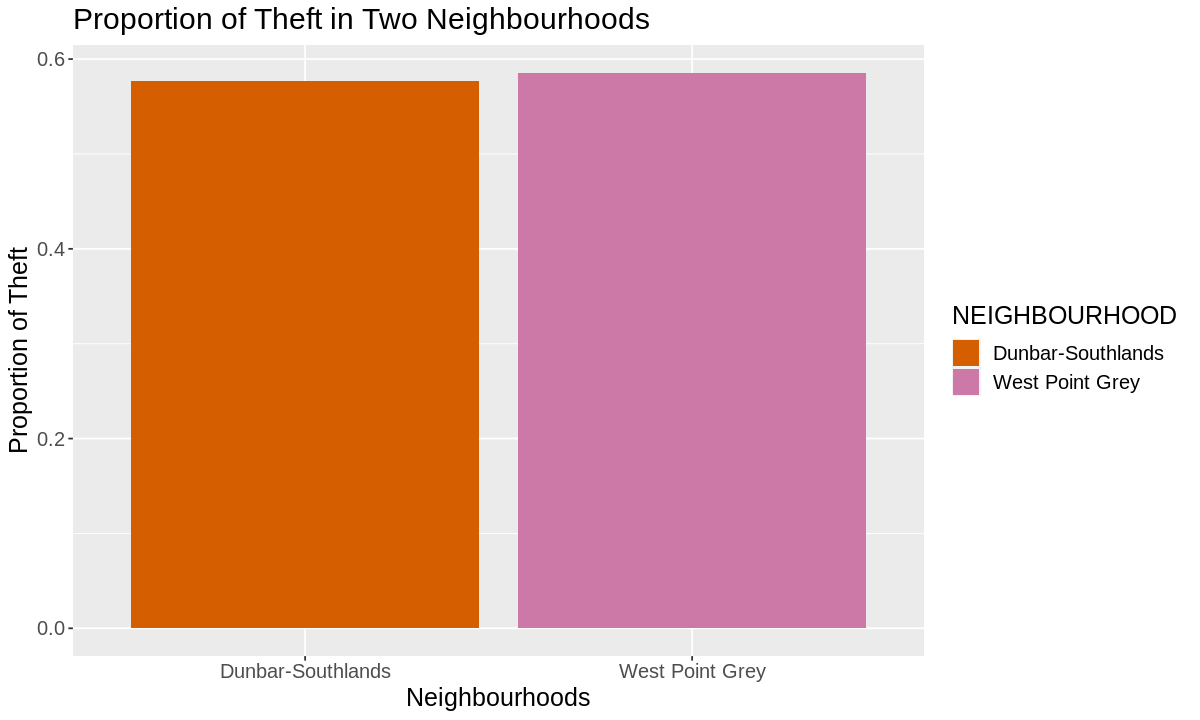

In [13]:
estimate_proportion_plot <- ggplot(crime_summary, aes(x = NEIGHBOURHOOD, y = prop, fill = NEIGHBOURHOOD)) +
    geom_bar(stat = "identity") +
    labs(title = "Proportion of Theft in Two Neighbourhoods",
       x = "Neighbourhoods",
       y = "Proportion of Theft") +
    theme(text = element_text(size = 15)) +
    scale_fill_manual(values= c("#D55E00", "#CC79A7"))
estimate_proportion_plot

We can see that the proportion of theft crime are similar for the two neighbourhoods but West Point Grey is slightly higher. We can also see that for both neighbourhood, theft is the majority type of crime.

**Now that We have completed the exploratory data analysis (EDA), we will move onto the actual analysis.**

We first take a large random sample from the population. As we are now involved with random sampling, we need to set the seed to make the analysis reproducible.

In [14]:
set.seed(1)

sample <- crime_recent_5_years %>%
    rep_sample_n(500)
head(sample)

replicate,TYPE,NEIGHBOURHOOD
<int>,<chr>,<chr>
1,Theft from Vehicle,West Point Grey
1,Break and Enter Residential/Other,Dunbar-Southlands
1,Theft from Vehicle,West Point Grey
1,Theft of Bicycle,West Point Grey
1,Theft from Vehicle,Dunbar-Southlands
1,Break and Enter Residential/Other,West Point Grey


From the random sample, we will make create bootstrap samples. Again, we need to set the seed for random sampling and we will keep the seed consisttent for simplicity.

In [15]:
set.seed(1)

bootstrap_samples <- sample %>%
    rep_sample_n(size = 500, reps = 1000, replace = TRUE)
head(bootstrap_samples)

replicate,TYPE,NEIGHBOURHOOD
<int>,<chr>,<chr>
1,Theft from Vehicle,Dunbar-Southlands
1,Theft of Vehicle,Dunbar-Southlands
1,Theft from Vehicle,Dunbar-Southlands
1,Mischief,Dunbar-Southlands
1,Theft from Vehicle,West Point Grey
1,Theft from Vehicle,Dunbar-Southlands


Then, we will tidy our data like what we did for EDA.

In [16]:
select_bootstrap <- bootstrap_samples %>%
    group_by(replicate, NEIGHBOURHOOD, TYPE) %>%
    summarize(count = n()) %>%
    pivot_wider(names_from = TYPE,
                values_from = count) %>%
    mutate(Theft = `Other Theft` + `Theft from Vehicle` + `Theft of Bicycle` + `Theft of Vehicle`) %>%
    select(-`Other Theft`, -`Theft from Vehicle`, -`Theft of Bicycle`, -`Theft of Vehicle`)

tidy_bootstrap <- select_bootstrap %>%
    replace(is.na(select_bootstrap), 0)

head(tidy_bootstrap)

`summarise()` has grouped output by 'replicate', 'NEIGHBOURHOOD'. You can
override using the `.groups` argument.


replicate,NEIGHBOURHOOD,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Offence Against a Person,Vehicle Collision or Pedestrian Struck (with Injury),Theft
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,Dunbar-Southlands,1,46,39,20,14,167
1,West Point Grey,9,32,17,5,13,137
2,Dunbar-Southlands,2,45,33,9,12,171
2,West Point Grey,12,35,23,9,4,145
3,Dunbar-Southlands,9,43,38,15,14,173
3,West Point Grey,4,25,21,7,11,140


Next, we will compute the parameters the same way, with the theft proportion as the first.

In [17]:
theft_proportion <- tidy_bootstrap %>%
    mutate(total_crime = sum(`Break and Enter Commercial`, `Break and Enter Residential/Other`, `Mischief`, 
           `Offence Against a Person`, `Vehicle Collision or Pedestrian Struck (with Injury)`, `Theft`),
           prop = Theft / total_crime) %>%
    select(replicate, NEIGHBOURHOOD, Theft, total_crime, prop)
head(theft_proportion)

replicate,NEIGHBOURHOOD,Theft,total_crime,prop
<int>,<chr>,<int>,<int>,<dbl>
1,Dunbar-Southlands,167,287,0.5818815
1,West Point Grey,137,213,0.6431925
2,Dunbar-Southlands,171,272,0.6286765
2,West Point Grey,145,228,0.6359649
3,Dunbar-Southlands,173,292,0.5924658
3,West Point Grey,140,208,0.6730769


We will now calculate the difference in proportions again with $p_w - p_d$

In [18]:
diff_in_prop <- theft_proportion %>% filter(NEIGHBOURHOOD == "West Point Grey") %>% pull(prop) -
    theft_proportion %>% filter(NEIGHBOURHOOD == "Dunbar-Southlands") %>% pull(prop)
head(diff_in_prop)

[1]  0.061310955  0.007288442  0.080611170 -0.043136690  0.043363179
[6] -0.077983068

Calculate the standard error

In [19]:
nw <- theft_proportion %>% filter(NEIGHBOURHOOD == "West Point Grey") %>% pull(Theft)
nd <- theft_proportion %>% filter(NEIGHBOURHOOD == "Dunbar-Southlands") %>% pull(Theft)
pw <- theft_proportion %>% filter(NEIGHBOURHOOD == "West Point Grey") %>% pull(prop)
pd <- theft_proportion %>% filter(NEIGHBOURHOOD == "Dunbar-Southlands") %>% pull(prop)
p_hat <- (nw * pw + nd * pd) / (nw + nd)

std_error <- sqrt(p_hat * (1 - p_hat) * (1 / nw + 1 / nd))
head(std_error)

[1] 0.05623585 0.05444259 0.05493029 0.05602418 0.05842558 0.05436475

To tidy the data, we also put them in the following table.

In [20]:
diff_in_proportion <- theft_proportion %>%
    select(replicate, NEIGHBOURHOOD, prop) %>%
    pivot_wider(names_from = NEIGHBOURHOOD,
                values_from = prop) %>%
    tibble(n_west_point_grey = nw,
           n_dunbar_southlands = nd,
           p_west_point_grey = pw,
           p_dunbar_southlands = pd,
           p_hat = p_hat,
           diff_in_prop = diff_in_prop,
           std_error = std_error)
head(diff_in_proportion)

replicate,Dunbar-Southlands,West Point Grey,n_west_point_grey,n_dunbar_southlands,p_west_point_grey,p_dunbar_southlands,p_hat,diff_in_prop,std_error
<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5818815,0.6431925,137,167,0.6431925,0.5818815,0.6095118,0.061310955,0.05623585
2,0.6286765,0.6359649,145,171,0.6359649,0.6286765,0.6320209,0.007288442,0.05444259
3,0.5924658,0.6730769,140,173,0.6730769,0.5924658,0.6285219,0.080611170,0.05493029
4,0.6294821,0.5863454,146,158,0.5863454,0.6294821,0.6087651,-0.043136690,0.05602418
5,0.5594406,0.6028037,129,160,0.6028037,0.5594406,0.5787964,0.043363179,0.05842558
6,0.6761566,0.5981735,131,190,0.5981735,0.6761566,0.6443317,-0.077983068,0.05436475


Then, we calculate the test-statistic.

In [23]:
test_statistic <- (pw - pd) / sqrt(p_hat * (1 - p_hat) * (1 / nw + 1 / nd))
head(test_statistic)

[1]  1.0902467  0.1338739  1.4675175 -0.7699656  0.7421951 -1.4344418

# Discussion
In this section, you’ll interpret the results you obtained in the previous section with respect to the main question/goal of your project.

* Summarize what you found, and the implications/impact of your findings.
* If relevant, discuss whether your results were what you expected to find.
* Discuss future questions/research this study could lead to.

We expect that West Point Grey will have a statistically significant higher proportion of theft compared to Dunbar Southlands, because it is closer to the UBC campus, which likely has a higher population density and floating population.

One drawback of our study is while big data may explain differences in the danger of theft and support governmental measures, it cannot explain individual cases or provide detailed plan of how to minimize the risks. Furthermore, a challenge we face is how to extrapolate our analysis to predict future crime rates, as that is the only important information for reducing crimes.

Our findings could impact residents living in either neighbourhoods if not both to be more aware of theft in their area and enforce relevant safety measures. It can also help individuals, especially UBC students living off-campus to decide which neighbourhood they would rather live in should that have related items such as bicycles or vehicles.


Should we find a statistical significance between the proportion of theft in both areas, it may raise further questions in determining the underlying motivations behind such thefts and what features cause an increase in theft in one area compared to another.

# References
Branch, Legislative Services. “Consolidated Federal Laws of Canada, Criminal Code.” Criminal Code, 27 July 2023, [laws-lois.justice.gc.ca/eng/acts/c-46/section-322.html](laws-lois.justice.gc.ca/eng/acts/c-46/section-322.html). 

Crime Statistics. “Crime Statistics.” Vancouver Police Department, 19 July 2023, [vpd.ca/crime-statistics/](vpd.ca/crime-statistics/). 

Government of Canada, Department of Justice. “State of the Criminal Justice System - 2019 Report.” Results by Outcome, 7 July 2021, [www.justice.gc.ca/eng/cj-jp/state-etat/2019rpt-rap2019/p7.html](www.justice.gc.ca/eng/cj-jp/state-etat/2019rpt-rap2019/p7.html). 

UBC. “Your Guide to Neighborhoods in Vancouver: UBC Vantage College.” Your Guide to Neighborhoods in Vancouver | UBC Vantage College, [vantagecollege.ubc.ca/blog/your-guide-neighborhoods-vancouver](vantagecollege.ubc.ca/blog/your-guide-neighborhoods-vancouver). Accessed 30 July 2023. 

Vancouver Police Department. “Vancouver Police Department Crime Data.” Accessed 30 July 2023. 